In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/test.csv")
df_train

id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [ ]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [ ]:
df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [ ]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There are no null values in the dataset


### DATA PREPROCESSING

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
def remove_contractions(text):
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)   
    

    return text

In [ ]:
def remove_chars(text):
     # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text,flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', ' ', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'[0-9]', '', text)
    text = text.strip()
    
    return text

In [ ]:
def remove_stopwords(text):
    # Remove stop words
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    
    return text

In [ ]:
def lemmatization(text):
    # Lemmatization
    lema = WordNetLemmatizer()
    text = text.split()
    text = [lema.lemmatize(w) for w in text]
    text = " ".join(text)
    
    return text

In [ ]:
df_train['comment_text'] = df_train['comment_text'].apply(remove_contractions)
print("Contractions expanded.")
df_train

Contractions expanded.


id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [ ]:
df_train['comment_text'] = df_train['comment_text'].apply(remove_chars)
print("Unwanted Characters Removed.")
df_train

Unwanted Characters Removed.


id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stops = set(stopwords.words('english')+['u' , 'umm' , 'ur' , '4' , '2' , 'dey' , 'im' , 'wat' , 'der'])
df_train['comment_text'] = df_train['comment_text'].apply(remove_stopwords)
print("Stopwords Removed.")
df_train

Stopwords Removed.


id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [ ]:
dictionary = {}

In [ ]:
def add_dict(text):
    # Adding words to dictionary
    text = text.split()
    for word in text:
        if word in dictionary:
            dictionary[word]+=1
        else:
            dictionary[word]=1

In [ ]:
df_train['comment_text'].apply(add_dict)
print("Dictionary Complete.")
df_train

Dictionary Complete.


id  ... loathe
0       0000997932d777bf  ...      0
1       000103f0d9cfb60f  ...      0
2       000113f07ec002fd  ...      0
3       0001b41b1c6bb37e  ...      0
4       0001d958c54c6e35  ...      0
...                  ...  ...    ...
159566  ffe987279560d7ff  ...      0
159567  ffea4adeee384e90  ...      0
159568  ffee36eab5c267c9  ...      0
159569  fff125370e4aaaf3  ...      0
159570  fff46fc426af1f9a  ...      0

[159571 rows x 8 columns]

In [ ]:
len(dictionary)

170820

##### We Can get the count of words with frequencies more than the threshold. This can be used to set the 'max_features' parameter


In [ ]:
count = 0
threshold = 15
feature_count = 0
delete = []
for word, count in dictionary.items():
    if count > threshold:
      feature_count+=1
    else:
      delete.append(word)
feature_count

18822

In [ ]:
for i in delete:
  dictionary.pop(i)
len(dictionary)

18822

In [ ]:
print(sorted(dictionary.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)) 

[('article', 56176), ('page', 45320), ('wikipedia', 44684), ('talk', 35923), ('would', 35038), ('please', 29155), ('one', 28288), ('like', 27350), ('see', 20826), ('also', 19789), ('think', 19705), ('know', 18688), ('edit', 17957), ('people', 17879), ('articles', 16353), ('use', 16147), ('time', 15428), ('may', 15174), ('user', 13746), ('thanks', 13627), ('get', 13112), ('even', 13042), ('make', 12640), ('good', 12544), ('could', 12467), ('well', 12108), ('information', 11685), ('deletion', 11377), ('want', 11368), ('way', 10974), ('sources', 10966), ('name', 10908), ('image', 10890), ('wp', 10690), ('first', 10645), ('pages', 10510), ('help', 10458), ('new', 10274), ('editing', 10182), ('go', 10108), ('fuck', 10052), ('need', 9994), ('source', 9906), ('say', 9869), ('section', 9849), ('edits', 9786), ('thank', 9651), ('made', 9413), ('many', 9236), ('much', 9224), ('really', 9037), ('discussion', 8952), ('deleted', 8944), ('used', 8860), ('find', 8724), ('work', 8569), ('since', 8420)

In [ ]:
df_train['Length'] = df_train.apply( lambda row : len(row['comment_text']) ,axis=1)
df_train

id  ... Length
0       0000997932d777bf  ...    158
1       000103f0d9cfb60f  ...     69
2       000113f07ec002fd  ...    141
3       0001b41b1c6bb37e  ...    381
4       0001d958c54c6e35  ...     29
...                  ...  ...    ...
159566  ffe987279560d7ff  ...    188
159567  ffea4adeee384e90  ...     36
159568  ffee36eab5c267c9  ...     62
159569  fff125370e4aaaf3  ...     57
159570  fff46fc426af1f9a  ...    110

[159571 rows x 9 columns]

### EDA

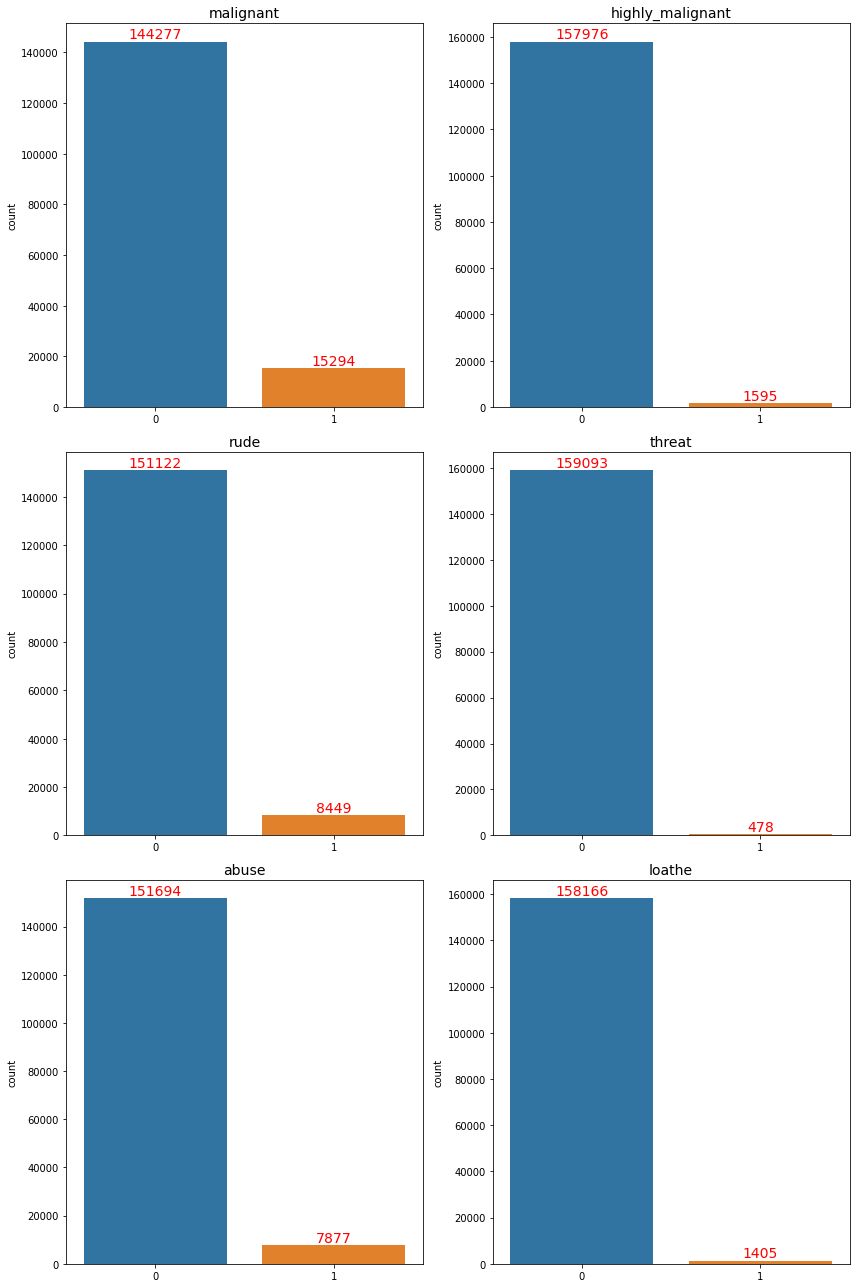

In [ ]:
plt.figure(figsize=(12,18))
j=1
for i in ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df_train[i])
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

* Approximately 10% of the comments are offensive.
* Most offensive comments fall under the category of 'malignant' while the least number of comments come under 'threat'.

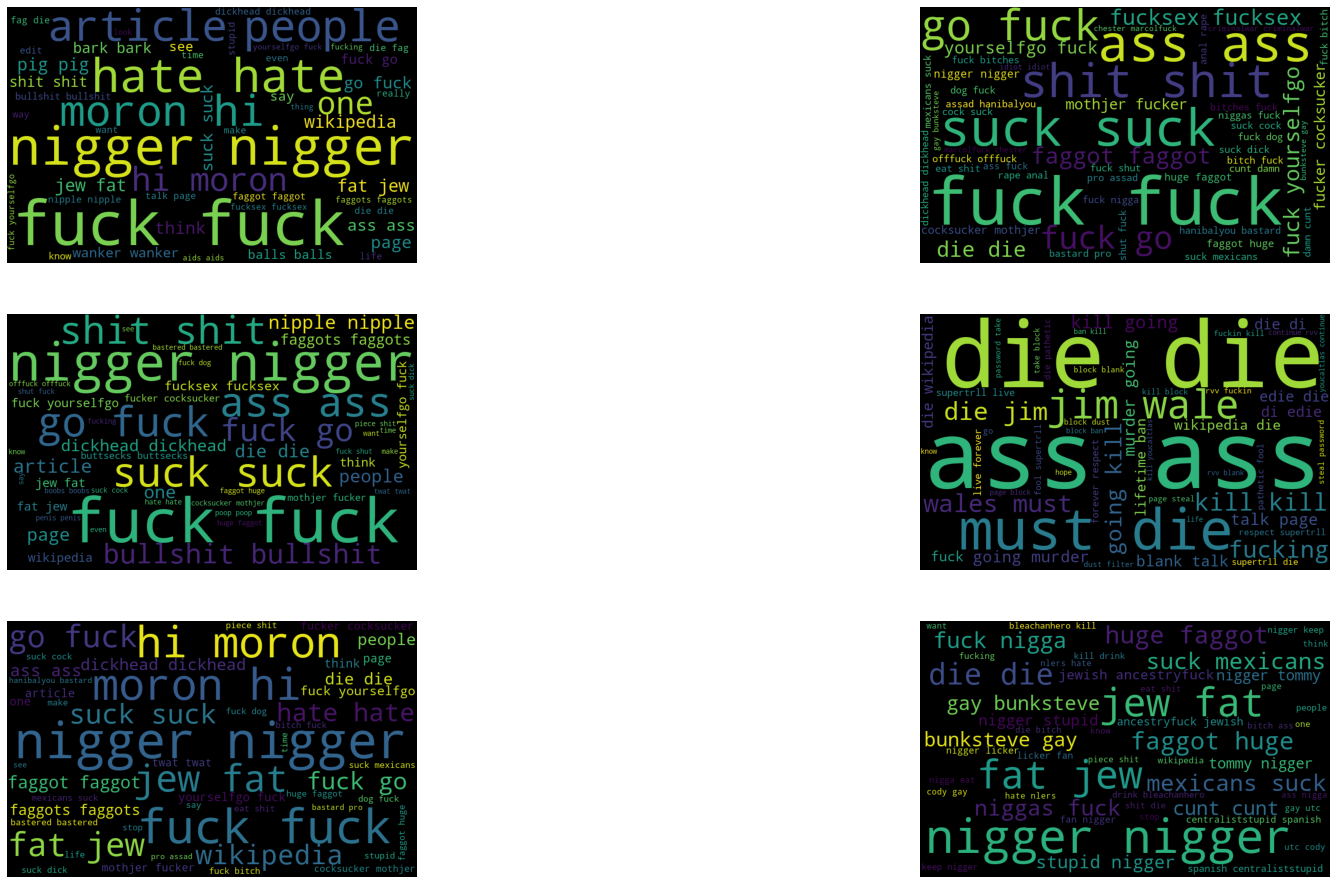

In [ ]:
from wordcloud import WordCloud
j=1
plt.figure(figsize=(30,16))
for i in ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']:
  plt.subplot(3,2,j)
  j=j+1
  hams = df_train['comment_text'][df_train[i]==1]
  spam_cloud = WordCloud(width=800,height=500,max_words=50).generate(' '.join(hams))
  plt.imshow(spam_cloud)
  plt.axis('off')
  # plt.tight_layout(pad=0)
plt.show()

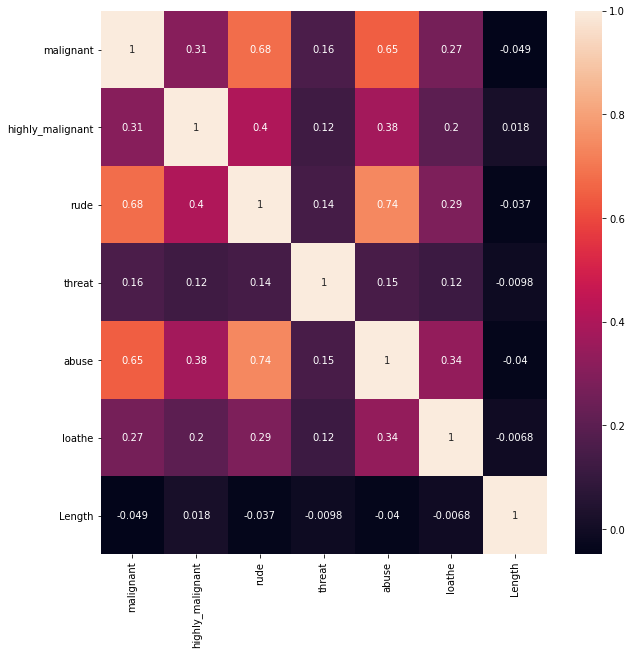

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe', 'Length']].corr(), annot=True)

* ‘Malignant’, ‘rude’ and ‘abuse‘ comments are highly correlated with each other.

               Length
malignant            
0          243.357528
1          181.999673
                      Length
highly_malignant            
0                 236.806597
1                 303.848276
         Length
rude           
0     240.75496
1     178.84081
            Length
threat            
0       237.676328
1       171.039749
           Length
abuse            
0      240.810395
1      173.277263
            Length
loathe            
0       237.714446
1       210.714591


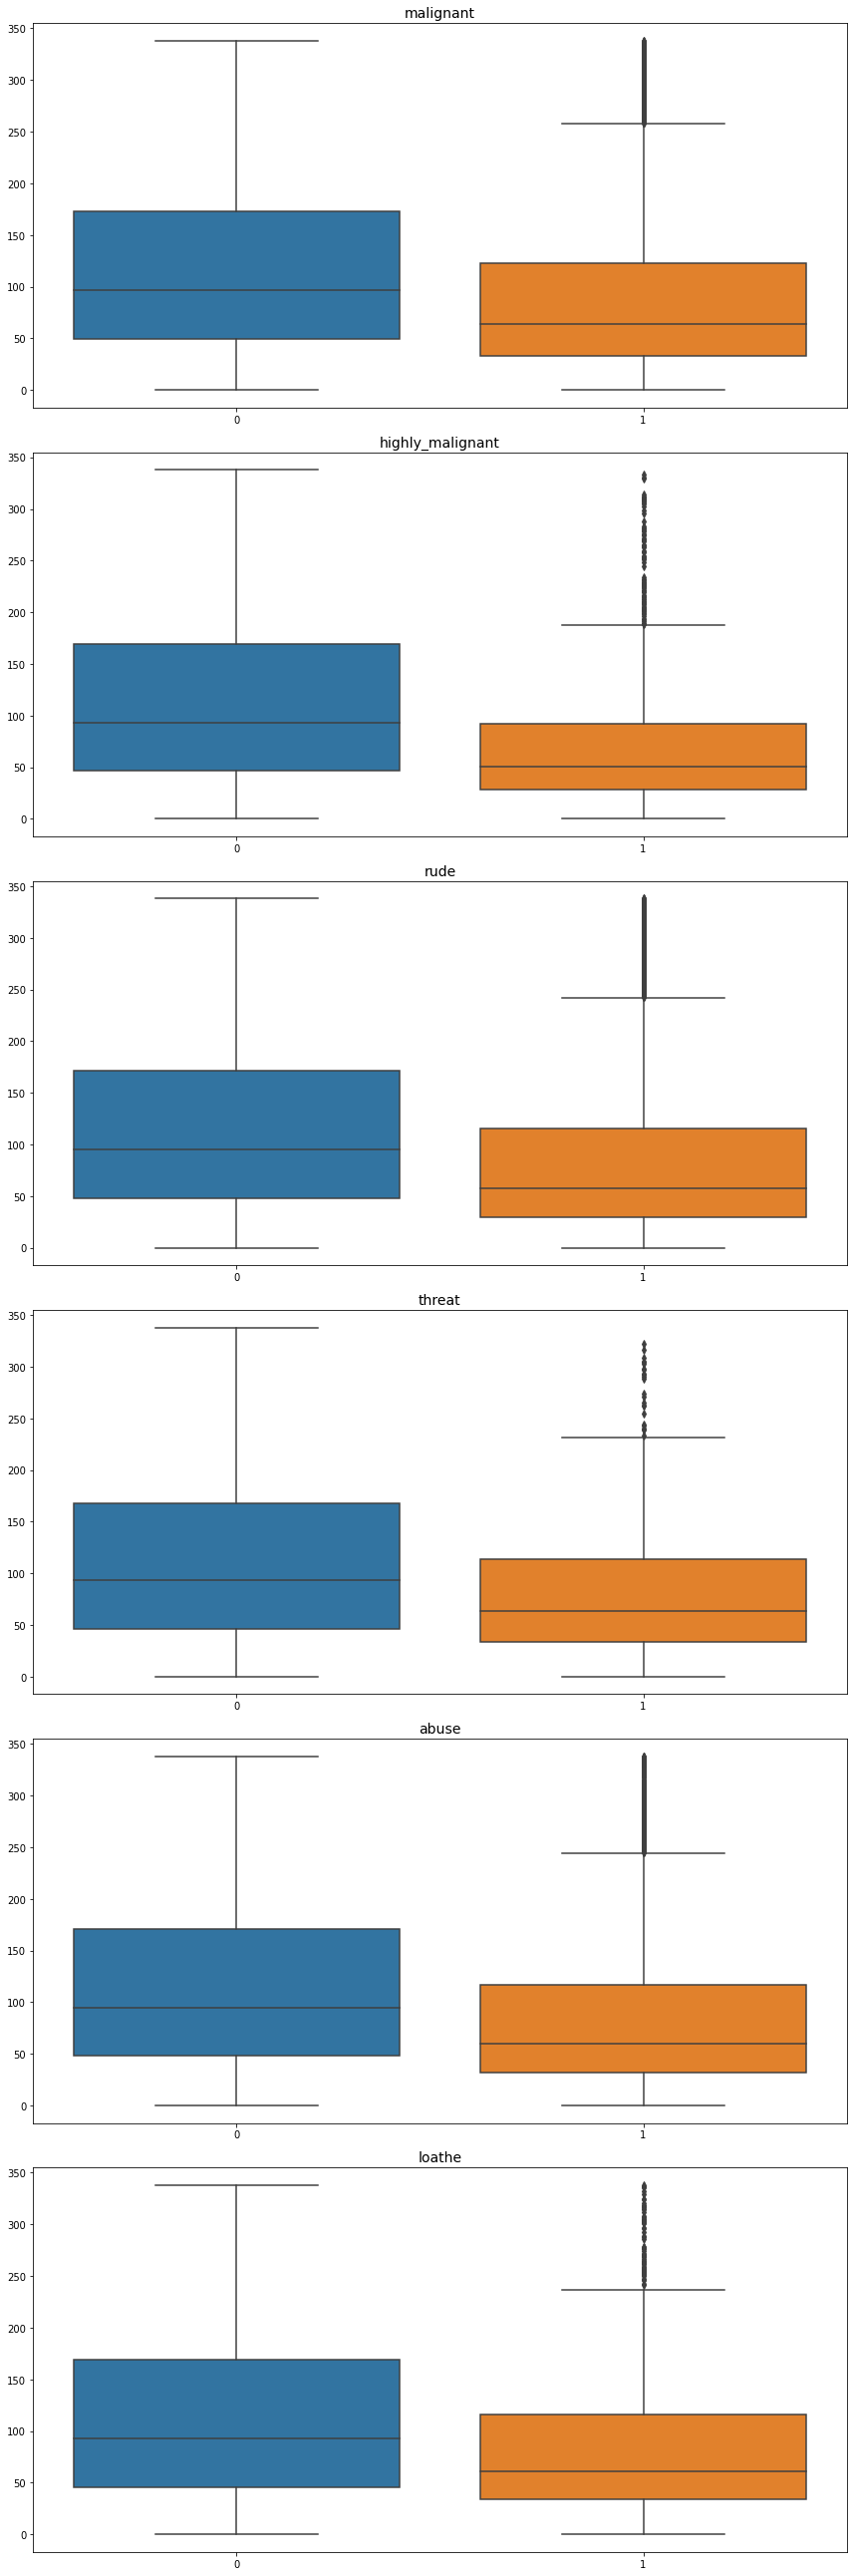

In [ ]:
plt.figure(figsize=(12,36))
j=1
df_temp = df_train.sort_values(by=['Length'])
for i in ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']:
    plt.subplot(6,1,j)
    j=j+1
    df_temp = df_train.sort_values(by=['Length']).reset_index(drop=True)
    ax = sns.boxplot(x = list(df_temp.loc[:130000,i]), y = list(df_temp.loc[:130000,"Length"]))
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
    print(df_train[[i,'Length']].groupby(i).mean())
plt.tight_layout()

* Most of the comments are of a shorter length than normal comments.
* Abusive comments have the highest difference between lengths.
* Only ‘highly_malignant’ comments have a higher length than normal comments.

### SPLITTING THE DATASET

In [ ]:
df_0 = df_train[(df_train['malignant']==0) & (df_train['highly_malignant']==0) & (df_train['rude']==0) & (df_train['threat']==0) & (df_train['abuse']==0) & (df_train['loathe']==0)].reset_index(drop=True)
df_1 = df_train[(df_train['malignant']==1) | (df_train['highly_malignant']==1) | (df_train['rude']==1) | (df_train['threat']==1) | (df_train['abuse']==1) & (df_train['loathe']==1)].reset_index(drop=True)

In [ ]:
split_0 = int(len(df_0)/4)
split_1 = int(len(df_1)/4)
print(split_0, split_1)

35836 3967


In [ ]:
df_a = pd.concat([df_0.loc[split_0*0:split_0*1,:], df_1.loc[split_1*0:split_1*1,:]]).reset_index(drop=True)
df_b = pd.concat([df_0.loc[split_0*1:split_0*2,:], df_1.loc[split_1*1:split_1*2,:]]).reset_index(drop=True)
df_c = pd.concat([df_0.loc[split_0*2:split_0*3,:], df_1.loc[split_1*2:split_1*3,:]]).reset_index(drop=True)
df_d = pd.concat([df_0.loc[split_0*3:split_0*4,:], df_1.loc[split_1*3:split_1*4,:]]).reset_index(drop=True)

In [ ]:
print(df_0['Length'].mean(),df_1['Length'].mean())

243.28721415316787 185.4979836168872


### DEFINING MODELS AND EVALUATION METRICS

In [ ]:
def emr(y_true, y_pred):
  n = len(y_true)
  row_indicators = np.all(y_true == y_pred, axis = 1) # axis = 1 will check for equality along rows.
  exact_match_count = np.sum(row_indicators)
  return exact_match_count/n

def hamming_loss(y_true, y_pred):
  hl_num = np.sum(np.logical_xor(y_true, y_pred))
  hl_den = np.prod(y_true.shape)
  return hl_num/hl_den

def label_based_micro_accuracy(y_true, y_pred):
  l_acc_num = np.sum(np.logical_and(y_true, y_pred))
  l_acc_den = np.sum(np.logical_or(y_true, y_pred))
  return l_acc_num/l_acc_den

def label_based_micro_precision(y_true, y_pred):
  l_prec_num = np.sum(np.logical_and(y_true, y_pred))
  l_prec_den = np.sum(y_pred)
  return l_prec_num/l_prec_den

def label_based_micro_recall(y_true, y_pred):
  l_recall_num = np.sum(np.logical_and(y_true, y_pred))
  l_recall_den = np.sum(y_true)
  return l_recall_num/l_recall_den

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_ngram = TfidfVectorizer(ngram_range=(1,2), analyzer='word', max_features=15000) # Initializing the Tfidf vectorizer with maximum of 23000 features and with ngram range of (1,3)
tfidf_vect_ngram.fit(df_train['comment_text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=15000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 3.8MB/s 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# Initializing the models and their parameters
models = {
    "GaussianNB" : {'model':GaussianNB(),
                    },
    
    "MultinomialNB" : {'model':MultinomialNB(),
                      },
}

### MODEL_1 BUILDING 

In [ ]:
from sklearn.model_selection import train_test_split
x = df_a['comment_text']
y = df_a[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train =  tfidf_vect_ngram.transform(x_train)
x_test =  tfidf_vect_ngram.transform(x_test)

In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = BinaryRelevance(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.7045819935691319
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9089630225080386
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9089630225080386


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = ClassifierChain(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.7051848874598071
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9134847266881029
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9134847266881029


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = LabelPowerset(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.7544212218649518
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9066519292604501
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9066519292604501


In [ ]:
from sklearn.metrics import roc_auc_score
classifier = ClassifierChain(MultinomialNB())
classifier.fit(x_train,y_train)
pred_test = classifier.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_test))

Accuracy Score :  0.9134847266881029


In [ ]:
pred_test_1 = pred_test.toarray()
y_test_1 = y_test.to_numpy()
print("Exact Match Ratio (EMR) : ",emr(y_test_1, pred_test_1))
print("Hamming Loss : ",hamming_loss(y_test_1, pred_test_1))
print("Micro Averaged Accuracy : ",label_based_micro_accuracy(y_test_1, pred_test_1))
print("Micro Averaged Precision : ",label_based_micro_precision(y_test_1, pred_test_1))
print("Micro Averaged Recall : ",label_based_micro_recall(y_test_1, pred_test_1))

Exact Match Ratio (EMR) :  0.9134847266881029
Hamming Loss :  0.024015273311897106
Micro Averaged Accuracy :  0.3895274584929757
Micro Averaged Precision :  0.8656575212866604
Micro Averaged Recall :  0.4145899410965111


In [ ]:
import joblib
joblib.dump(classifier,"Classifier_1.pkl")

['Classifier_1.pkl']

### MODEL_2 BUILDING

In [ ]:
from sklearn.model_selection import train_test_split
x = df_b['comment_text']
y = df_b[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train =  tfidf_vect_ngram.transform(x_train)
x_test =  tfidf_vect_ngram.transform(x_test)

In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = BinaryRelevance(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.6991559485530546
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9071543408360129
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9071543408360129


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = ClassifierChain(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.7000602893890675
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.916298231511254
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.916298231511254


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = LabelPowerset(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.7509043408360129
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9052451768488746
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9052451768488746


In [ ]:
from sklearn.metrics import roc_auc_score
classifier = ClassifierChain(MultinomialNB())
classifier.fit(x_train,y_train)
pred_test = classifier.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_test))

Accuracy Score :  0.916298231511254


In [ ]:
pred_test_1 = pred_test.toarray()
y_test_1 = y_test.to_numpy()
print("Exact Match Ratio (EMR) : ",emr(y_test_1, pred_test_1))
print("Hamming Loss : ",hamming_loss(y_test_1, pred_test_1))
print("Micro Averaged Accuracy : ",label_based_micro_accuracy(y_test_1, pred_test_1))
print("Micro Averaged Precision : ",label_based_micro_precision(y_test_1, pred_test_1))
print("Micro Averaged Recall : ",label_based_micro_recall(y_test_1, pred_test_1))

Exact Match Ratio (EMR) :  0.916298231511254
Hamming Loss :  0.02297695605573419
Micro Averaged Accuracy :  0.40683095546908776
Micro Averaged Precision :  0.87291280148423
Micro Averaged Recall :  0.43244485294117646


In [ ]:
import joblib
joblib.dump(classifier,"Classifier_2.pkl")

['Classifier_2.pkl']

### MODEL_3 BUILDING

In [ ]:
from sklearn.model_selection import train_test_split
x = df_c['comment_text']
y = df_c[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train =  tfidf_vect_ngram.transform(x_train)
x_test =  tfidf_vect_ngram.transform(x_test)

In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = BinaryRelevance(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.7018689710610932
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9077572347266881
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9077572347266881


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = ClassifierChain(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.7022709003215434
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9147909967845659
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9147909967845659


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = LabelPowerset(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.7562299035369775
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9061495176848875
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9061495176848875


In [ ]:
from sklearn.metrics import roc_auc_score
classifier = ClassifierChain(MultinomialNB())
classifier.fit(x_train,y_train)
pred_test = classifier.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_test))

Accuracy Score :  0.9147909967845659


In [ ]:
pred_test_1 = pred_test.toarray()
y_test_1 = y_test.to_numpy()
print("Exact Match Ratio (EMR) : ",emr(y_test_1, pred_test_1))
print("Hamming Loss : ",hamming_loss(y_test_1, pred_test_1))
print("Micro Averaged Accuracy : ",label_based_micro_accuracy(y_test_1, pred_test_1))
print("Micro Averaged Precision : ",label_based_micro_precision(y_test_1, pred_test_1))
print("Micro Averaged Recall : ",label_based_micro_recall(y_test_1, pred_test_1))

Exact Match Ratio (EMR) :  0.9147909967845659
Hamming Loss :  0.023914790996784566
Micro Averaged Accuracy :  0.38738738738738737
Micro Averaged Precision :  0.887905604719764
Micro Averaged Recall :  0.40730717185385656


In [ ]:
import joblib
joblib.dump(classifier,"Classifier_3.pkl")

['Classifier_3.pkl']

### MODEL_4 BUILDING

In [ ]:
from sklearn.model_selection import train_test_split
x = df_d['comment_text']
y = df_d[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train =  tfidf_vect_ngram.transform(x_train)
x_test =  tfidf_vect_ngram.transform(x_test)

In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = BinaryRelevance(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.697548231511254
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.907556270096463
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.907556270096463


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = ClassifierChain(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.6984525723472669
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.913685691318328
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.913685691318328


In [ ]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    classifier = LabelPowerset(j['model'])
    best_model_scr = 0
    
    classifier.fit(x_train,y_train)
    pred_test = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  0.7603496784565916
-------------------------------------------------------------------------------------------
Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Score :  0.9052451768488746
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Best Score :  0.9052451768488746


In [ ]:
from sklearn.metrics import roc_auc_score
classifier = ClassifierChain(MultinomialNB())
classifier.fit(x_train,y_train)
pred_test = classifier.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_test))

Accuracy Score :  0.913685691318328


In [ ]:
pred_test_1 = pred_test.toarray()
y_test_1 = y_test.to_numpy()
print("Exact Match Ratio (EMR) : ",emr(y_test_1, pred_test_1))
print("Hamming Loss : ",hamming_loss(y_test_1, pred_test_1))
print("Micro Averaged Accuracy : ",label_based_micro_accuracy(y_test_1, pred_test_1))
print("Micro Averaged Precision : ",label_based_micro_precision(y_test_1, pred_test_1))
print("Micro Averaged Recall : ",label_based_micro_recall(y_test_1, pred_test_1))

Exact Match Ratio (EMR) :  0.913685691318328
Hamming Loss :  0.02451768488745981
Micro Averaged Accuracy :  0.36869340232858994
Micro Averaged Precision :  0.8697863682604272
Micro Averaged Recall :  0.3902327704244637


In [ ]:
import joblib
joblib.dump(classifier,"Classifier_4.pkl")

['Classifier_4.pkl']

### LOADING MODELS

In [ ]:
from sklearn.model_selection import train_test_split

x1 = df_test.loc[:38290,'comment_text']
x2 = df_test.loc[38291:(38291*2)-1,'comment_text']
x3 = df_test.loc[38291*2:(38291*3)-1,'comment_text']
x4 = df_test.loc[(38291*3)+1:,'comment_text']
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_ngram = TfidfVectorizer(ngram_range=(1,2), analyzer='word', max_features=15000) # Initializing the Tfidf vectorizer with maximum of 23000 features and with ngram range of (1,3)
tfidf_vect_ngram.fit(df_train['comment_text'])
x1 =  tfidf_vect_ngram.transform(x1)
x2 =  tfidf_vect_ngram.transform(x2)
x3 =  tfidf_vect_ngram.transform(x3)
x4 =  tfidf_vect_ngram.transform(x4)


#### CLASSIFIER_1

In [ ]:
import joblib
loaded_model_1 = joblib.load("Classifier_1.pkl")
loaded_model_1

ClassifierChain(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                         fit_prior=True),
                order=None, require_dense=[True, True])

In [ ]:
pred1 = loaded_model_1.predict(x1)
pred1_df = pd.DataFrame(pred1.toarray())
pred1_df[(pred1_df[0]==1) |(pred1_df[1]==1) | (pred1_df[2]==1) | (pred1_df[3]==1) | (pred1_df[4]==1) | (pred1_df[5]==1)]

0    1    2    3    4    5
0      1.0  0.0  1.0  0.0  1.0  0.0
48     1.0  0.0  1.0  0.0  1.0  0.0
59     1.0  0.0  1.0  0.0  1.0  0.0
60     1.0  0.0  1.0  0.0  1.0  0.0
70     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38243  1.0  0.0  1.0  0.0  1.0  0.0
38246  1.0  0.0  0.0  0.0  0.0  0.0
38254  1.0  0.0  1.0  0.0  1.0  0.0
38265  1.0  0.0  1.0  0.0  1.0  0.0
38277  1.0  0.0  1.0  0.0  1.0  0.0

[3077 rows x 6 columns]

In [ ]:
pred2 = loaded_model_1.predict(x2)
pred2_df = pd.DataFrame(pred2.toarray())
pred2_df[(pred2_df[0]==1) | (pred2_df[1]==1) | (pred2_df[2]==1) | (pred2_df[3]==1) | (pred2_df[4]==1) | (pred2_df[5]==1)]

0    1    2    3    4    5
15     1.0  0.0  1.0  0.0  1.0  0.0
31     1.0  0.0  1.0  0.0  1.0  0.0
66     1.0  0.0  1.0  0.0  1.0  0.0
73     1.0  0.0  1.0  0.0  1.0  0.0
75     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38242  1.0  0.0  1.0  0.0  1.0  0.0
38254  1.0  0.0  0.0  0.0  1.0  0.0
38268  1.0  0.0  1.0  0.0  1.0  0.0
38274  1.0  0.0  1.0  0.0  1.0  0.0
38288  1.0  0.0  1.0  0.0  1.0  0.0

[3046 rows x 6 columns]

In [ ]:
pred3 = loaded_model_1.predict(x3)
pred3_df = pd.DataFrame(pred3.toarray())
pred3_df[(pred3_df[0]==1) |(pred3_df[1]==1) | (pred3_df[2]==1) | (pred3_df[3]==1) | (pred3_df[4]==1) | (pred3_df[5]==1)]

0    1    2    3    4    5
10     1.0  0.0  1.0  0.0  1.0  0.0
19     1.0  0.0  1.0  0.0  1.0  0.0
21     1.0  0.0  1.0  0.0  1.0  0.0
49     1.0  0.0  1.0  0.0  1.0  0.0
51     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38202  1.0  0.0  1.0  0.0  1.0  0.0
38203  1.0  0.0  0.0  0.0  0.0  0.0
38224  1.0  0.0  1.0  0.0  1.0  0.0
38228  1.0  0.0  1.0  0.0  1.0  0.0
38267  1.0  0.0  1.0  0.0  1.0  0.0

[3097 rows x 6 columns]

In [ ]:
pred4 = loaded_model_1.predict(x3)
pred4_df = pd.DataFrame(pred4.toarray())
pred4_df[(pred4_df[0]==1) |(pred4_df[1]==1) | (pred4_df[2]==1) | (pred4_df[3]==1) | (pred4_df[4]==1) | (pred4_df[5]==1)]

0    1    2    3    4    5
10     1.0  0.0  1.0  0.0  1.0  0.0
19     1.0  0.0  1.0  0.0  1.0  0.0
21     1.0  0.0  1.0  0.0  1.0  0.0
49     1.0  0.0  1.0  0.0  1.0  0.0
51     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38202  1.0  0.0  1.0  0.0  1.0  0.0
38203  1.0  0.0  0.0  0.0  0.0  0.0
38224  1.0  0.0  1.0  0.0  1.0  0.0
38228  1.0  0.0  1.0  0.0  1.0  0.0
38267  1.0  0.0  1.0  0.0  1.0  0.0

[3097 rows x 6 columns]

In [ ]:
df_cl_1 = pd.concat([pred1_df,pred2_df,pred3_df,pred4_df])
df_cl_1.reset_index(inplace=True,drop=True)
for i in df_cl_1.columns:
  df_cl_1[i] = df_cl_1[i].astype(int)
df_cl_1

0  1  2  3  4  5
0       1  0  1  0  1  0
1       0  0  0  0  0  0
2       0  0  0  0  0  0
3       0  0  0  0  0  0
4       0  0  0  0  0  0
...    .. .. .. .. .. ..
153159  0  0  0  0  0  0
153160  0  0  0  0  0  0
153161  0  0  0  0  0  0
153162  0  0  0  0  0  0
153163  0  0  0  0  0  0

[153164 rows x 6 columns]

#### CLASSIFIER_2

In [ ]:
import joblib
loaded_model_2 = joblib.load("Classifier_2.pkl")
loaded_model_2

ClassifierChain(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                         fit_prior=True),
                order=None, require_dense=[True, True])

In [ ]:
pred1 = loaded_model_2.predict(x1)
pred1_df = pd.DataFrame(pred1.toarray())
pred1_df[(pred1_df[0]==1) |(pred1_df[1]==1) | (pred1_df[2]==1) | (pred1_df[3]==1) | (pred1_df[4]==1) | (pred1_df[5]==1)]

0    1    2    3    4    5
0      1.0  0.0  1.0  0.0  1.0  0.0
48     1.0  0.0  1.0  0.0  1.0  0.0
59     1.0  0.0  1.0  0.0  1.0  0.0
70     1.0  0.0  1.0  0.0  1.0  0.0
81     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38242  1.0  0.0  1.0  0.0  1.0  0.0
38243  1.0  0.0  1.0  0.0  1.0  0.0
38254  1.0  0.0  1.0  0.0  1.0  0.0
38265  1.0  0.0  1.0  0.0  1.0  0.0
38277  1.0  0.0  1.0  0.0  1.0  0.0

[3109 rows x 6 columns]

In [ ]:
pred2 = loaded_model_2.predict(x2)
pred2_df = pd.DataFrame(pred2.toarray())
pred2_df[(pred2_df[0]==1) | (pred2_df[1]==1) | (pred2_df[2]==1) | (pred2_df[3]==1) | (pred2_df[4]==1) | (pred2_df[5]==1)]

0    1    2    3    4    5
15     1.0  0.0  1.0  0.0  1.0  0.0
31     1.0  0.0  1.0  0.0  1.0  0.0
66     1.0  0.0  1.0  0.0  1.0  0.0
73     1.0  0.0  1.0  0.0  1.0  0.0
74     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38230  1.0  0.0  1.0  0.0  1.0  0.0
38240  1.0  0.0  1.0  0.0  1.0  0.0
38268  1.0  0.0  1.0  0.0  1.0  0.0
38274  1.0  0.0  1.0  0.0  1.0  0.0
38288  1.0  0.0  1.0  0.0  1.0  0.0

[3087 rows x 6 columns]

In [ ]:
pred3 = loaded_model_2.predict(x3)
pred3_df = pd.DataFrame(pred3.toarray())
pred3_df[(pred3_df[0]==1) |(pred3_df[1]==1) | (pred3_df[2]==1) | (pred3_df[3]==1) | (pred3_df[4]==1) | (pred3_df[5]==1)]

0    1    2    3    4    5
9      1.0  0.0  1.0  0.0  1.0  0.0
19     1.0  0.0  1.0  0.0  1.0  0.0
21     1.0  0.0  1.0  0.0  1.0  0.0
49     1.0  0.0  1.0  0.0  1.0  0.0
51     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38228  1.0  0.0  1.0  0.0  1.0  0.0
38267  1.0  0.0  1.0  0.0  1.0  0.0
38278  1.0  0.0  1.0  0.0  1.0  0.0
38281  1.0  0.0  1.0  0.0  1.0  0.0
38282  1.0  0.0  1.0  0.0  1.0  0.0

[3097 rows x 6 columns]

In [ ]:
pred4 = loaded_model_2.predict(x3)
pred4_df = pd.DataFrame(pred4.toarray())
pred4_df[(pred4_df[0]==1) |(pred4_df[1]==1) | (pred4_df[2]==1) | (pred4_df[3]==1) | (pred4_df[4]==1) | (pred4_df[5]==1)]

0    1    2    3    4    5
9      1.0  0.0  1.0  0.0  1.0  0.0
19     1.0  0.0  1.0  0.0  1.0  0.0
21     1.0  0.0  1.0  0.0  1.0  0.0
49     1.0  0.0  1.0  0.0  1.0  0.0
51     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38228  1.0  0.0  1.0  0.0  1.0  0.0
38267  1.0  0.0  1.0  0.0  1.0  0.0
38278  1.0  0.0  1.0  0.0  1.0  0.0
38281  1.0  0.0  1.0  0.0  1.0  0.0
38282  1.0  0.0  1.0  0.0  1.0  0.0

[3097 rows x 6 columns]

In [ ]:
df_cl_2 = pd.concat([pred1_df,pred2_df,pred3_df,pred4_df])
df_cl_2.reset_index(inplace=True,drop=True)
for i in df_cl_2.columns:
  df_cl_2[i] = df_cl_2[i].astype(int)
df_cl_2

0  1  2  3  4  5
0       1  0  1  0  1  0
1       0  0  0  0  0  0
2       0  0  0  0  0  0
3       0  0  0  0  0  0
4       0  0  0  0  0  0
...    .. .. .. .. .. ..
153159  0  0  0  0  0  0
153160  0  0  0  0  0  0
153161  0  0  0  0  0  0
153162  0  0  0  0  0  0
153163  0  0  0  0  0  0

[153164 rows x 6 columns]

In [ ]:
df_cl_1.equals(df_cl_2)

False

In [ ]:
a = (df_cl_1 != df_cl_2).any(1)
count=0
ind = []
for i in range(len(a)):
  if a[i]==True:
    ind.append(i)
    count+=1
count

4012

In [ ]:
df_cl = pd.DataFrame(columns = [0,1,2,3,4,5])
df_cl

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5]
Index: []

In [ ]:
df_cl[0] = df_cl_1[0] | df_cl_2[0]
df_cl[1] = df_cl_1[1] | df_cl_2[1]
df_cl[2] = df_cl_1[2] | df_cl_2[2]
df_cl[3] = df_cl_1[3] | df_cl_2[3]
df_cl[4] = df_cl_1[4] | df_cl_2[4]
df_cl[5] = df_cl_1[5] | df_cl_2[5]

In [ ]:
df_cl

0  1  2  3  4  5
0       1  0  1  0  1  0
1       0  0  0  0  0  0
2       0  0  0  0  0  0
3       0  0  0  0  0  0
4       0  0  0  0  0  0
...    .. .. .. .. .. ..
153159  0  0  0  0  0  0
153160  0  0  0  0  0  0
153161  0  0  0  0  0  0
153162  0  0  0  0  0  0
153163  0  0  0  0  0  0

[153164 rows x 6 columns]

#### CLASSIFIER_3

In [ ]:
import joblib
loaded_model_3 = joblib.load("Classifier_3.pkl")
loaded_model_3

ClassifierChain(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                         fit_prior=True),
                order=None, require_dense=[True, True])

In [ ]:
pred1 = loaded_model_3.predict(x1)
pred1_df = pd.DataFrame(pred1.toarray())
pred1_df[(pred1_df[0]==1) |(pred1_df[1]==1) | (pred1_df[2]==1) | (pred1_df[3]==1) | (pred1_df[4]==1) | (pred1_df[5]==1)]

0    1    2    3    4    5
0      1.0  0.0  1.0  0.0  1.0  0.0
48     1.0  0.0  1.0  0.0  1.0  0.0
59     1.0  0.0  1.0  0.0  1.0  0.0
70     1.0  0.0  1.0  0.0  1.0  0.0
81     1.0  0.0  0.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38238  1.0  0.0  1.0  0.0  1.0  0.0
38241  1.0  0.0  1.0  0.0  1.0  0.0
38243  1.0  0.0  1.0  0.0  1.0  0.0
38265  1.0  0.0  1.0  0.0  1.0  0.0
38277  1.0  0.0  1.0  0.0  1.0  0.0

[3387 rows x 6 columns]

In [ ]:
pred2 = loaded_model_3.predict(x2)
pred2_df = pd.DataFrame(pred2.toarray())
pred2_df[(pred2_df[0]==1) | (pred2_df[1]==1) | (pred2_df[2]==1) | (pred2_df[3]==1) | (pred2_df[4]==1) | (pred2_df[5]==1)]

0    1    2    3    4    5
15     1.0  0.0  1.0  0.0  1.0  0.0
31     1.0  0.0  1.0  0.0  1.0  0.0
43     1.0  0.0  1.0  0.0  1.0  0.0
66     1.0  0.0  1.0  0.0  1.0  0.0
73     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38240  1.0  0.0  1.0  0.0  1.0  0.0
38242  1.0  0.0  1.0  0.0  1.0  0.0
38268  1.0  0.0  1.0  0.0  1.0  0.0
38274  1.0  0.0  1.0  0.0  1.0  0.0
38288  1.0  0.0  1.0  0.0  1.0  0.0

[3352 rows x 6 columns]

In [ ]:
pred3 = loaded_model_3.predict(x3)
pred3_df = pd.DataFrame(pred3.toarray())
pred3_df[(pred3_df[0]==1) |(pred3_df[1]==1) | (pred3_df[2]==1) | (pred3_df[3]==1) | (pred3_df[4]==1) | (pred3_df[5]==1)]

0    1    2    3    4    5
9      1.0  0.0  1.0  0.0  1.0  0.0
19     1.0  0.0  1.0  0.0  1.0  0.0
21     1.0  0.0  1.0  0.0  1.0  0.0
51     1.0  0.0  1.0  0.0  1.0  0.0
54     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38224  1.0  0.0  1.0  0.0  1.0  0.0
38228  1.0  0.0  1.0  0.0  1.0  0.0
38261  1.0  0.0  1.0  0.0  1.0  0.0
38281  1.0  0.0  1.0  0.0  1.0  0.0
38282  1.0  0.0  1.0  0.0  1.0  0.0

[3426 rows x 6 columns]

In [ ]:
pred4 = loaded_model_3.predict(x3)
pred4_df = pd.DataFrame(pred4.toarray())
pred4_df[(pred4_df[0]==1) |(pred4_df[1]==1) | (pred4_df[2]==1) | (pred4_df[3]==1) | (pred4_df[4]==1) | (pred4_df[5]==1)]

0    1    2    3    4    5
9      1.0  0.0  1.0  0.0  1.0  0.0
19     1.0  0.0  1.0  0.0  1.0  0.0
21     1.0  0.0  1.0  0.0  1.0  0.0
51     1.0  0.0  1.0  0.0  1.0  0.0
54     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38224  1.0  0.0  1.0  0.0  1.0  0.0
38228  1.0  0.0  1.0  0.0  1.0  0.0
38261  1.0  0.0  1.0  0.0  1.0  0.0
38281  1.0  0.0  1.0  0.0  1.0  0.0
38282  1.0  0.0  1.0  0.0  1.0  0.0

[3426 rows x 6 columns]

In [ ]:
df_cl_3 = pd.concat([pred1_df,pred2_df,pred3_df,pred4_df])
df_cl_3.reset_index(inplace=True,drop=True)
for i in df_cl_3.columns:
  df_cl_3[i] = df_cl_3[i].astype(int)
df_cl_3

0  1  2  3  4  5
0       1  0  1  0  1  0
1       0  0  0  0  0  0
2       0  0  0  0  0  0
3       0  0  0  0  0  0
4       0  0  0  0  0  0
...    .. .. .. .. .. ..
153159  0  0  0  0  0  0
153160  0  0  0  0  0  0
153161  0  0  0  0  0  0
153162  0  0  0  0  0  0
153163  0  0  0  0  0  0

[153164 rows x 6 columns]

In [ ]:
df_cl.equals(df_cl_3)

False

In [ ]:
a = (df_cl != df_cl_3).any(1)
count=0
ind = []
for i in range(len(a)):
  if a[i]==True:
    ind.append(i)
    count+=1
count

3414

In [ ]:
df_cl[0] = df_cl[0] | df_cl_3[0]
df_cl[1] = df_cl[1] | df_cl_3[1]
df_cl[2] = df_cl[2] | df_cl_3[2]
df_cl[3] = df_cl[3] | df_cl_3[3]
df_cl[4] = df_cl[4] | df_cl_3[4]
df_cl[5] = df_cl[5] | df_cl_3[5]

In [ ]:
df_cl

0  1  2  3  4  5
0       1  0  1  0  1  0
1       0  0  0  0  0  0
2       0  0  0  0  0  0
3       0  0  0  0  0  0
4       0  0  0  0  0  0
...    .. .. .. .. .. ..
153159  0  0  0  0  0  0
153160  0  0  0  0  0  0
153161  0  0  0  0  0  0
153162  0  0  0  0  0  0
153163  0  0  0  0  0  0

[153164 rows x 6 columns]

#### CLASSIFIER_4

In [ ]:
import joblib
loaded_model_4 = joblib.load("Classifier_4.pkl")
loaded_model_4

ClassifierChain(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                         fit_prior=True),
                order=None, require_dense=[True, True])

In [ ]:
pred1 = loaded_model_4.predict(x1)
pred1_df = pd.DataFrame(pred1.toarray())
pred1_df[(pred1_df[0]==1) |(pred1_df[1]==1) | (pred1_df[2]==1) | (pred1_df[3]==1) | (pred1_df[4]==1) | (pred1_df[5]==1)]

0    1    2    3    4    5
0      1.0  0.0  1.0  0.0  1.0  0.0
48     1.0  0.0  1.0  0.0  1.0  0.0
59     1.0  0.0  1.0  0.0  1.0  0.0
70     1.0  0.0  1.0  0.0  1.0  0.0
81     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38238  1.0  0.0  1.0  0.0  1.0  0.0
38242  1.0  0.0  1.0  0.0  1.0  0.0
38243  1.0  0.0  1.0  0.0  1.0  0.0
38246  1.0  0.0  0.0  0.0  0.0  0.0
38277  1.0  0.0  1.0  0.0  1.0  0.0

[2695 rows x 6 columns]

In [ ]:
pred2 = loaded_model_4.predict(x2)
pred2_df = pd.DataFrame(pred2.toarray())
pred2_df[(pred2_df[0]==1) | (pred2_df[1]==1) | (pred2_df[2]==1) | (pred2_df[3]==1) | (pred2_df[4]==1) | (pred2_df[5]==1)]

0    1    2    3    4    5
15     1.0  0.0  1.0  0.0  1.0  0.0
31     1.0  0.0  1.0  0.0  1.0  0.0
66     1.0  0.0  1.0  0.0  1.0  0.0
73     1.0  0.0  1.0  0.0  1.0  0.0
75     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38240  1.0  0.0  1.0  0.0  1.0  0.0
38242  1.0  0.0  1.0  0.0  1.0  0.0
38268  1.0  0.0  1.0  0.0  1.0  0.0
38274  1.0  0.0  1.0  0.0  1.0  0.0
38288  1.0  0.0  1.0  0.0  1.0  0.0

[2654 rows x 6 columns]

In [ ]:
pred3 = loaded_model_4.predict(x3)
pred3_df = pd.DataFrame(pred3.toarray())
pred3_df[(pred3_df[0]==1) |(pred3_df[1]==1) | (pred3_df[2]==1) | (pred3_df[3]==1) | (pred3_df[4]==1) | (pred3_df[5]==1)]

0    1    2    3    4    5
10     1.0  0.0  0.0  0.0  0.0  0.0
19     1.0  0.0  1.0  0.0  1.0  0.0
21     1.0  0.0  1.0  0.0  1.0  0.0
51     1.0  0.0  1.0  0.0  1.0  0.0
52     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38202  1.0  0.0  1.0  0.0  1.0  0.0
38224  1.0  0.0  1.0  0.0  1.0  0.0
38228  1.0  0.0  1.0  0.0  1.0  0.0
38267  1.0  0.0  1.0  0.0  1.0  0.0
38282  1.0  0.0  1.0  0.0  1.0  0.0

[2692 rows x 6 columns]

In [ ]:
pred4 = loaded_model_4.predict(x3)
pred4_df = pd.DataFrame(pred4.toarray())
pred4_df[(pred4_df[0]==1) |(pred4_df[1]==1) | (pred4_df[2]==1) | (pred4_df[3]==1) | (pred4_df[4]==1) | (pred4_df[5]==1)]

0    1    2    3    4    5
10     1.0  0.0  0.0  0.0  0.0  0.0
19     1.0  0.0  1.0  0.0  1.0  0.0
21     1.0  0.0  1.0  0.0  1.0  0.0
51     1.0  0.0  1.0  0.0  1.0  0.0
52     1.0  0.0  1.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
38202  1.0  0.0  1.0  0.0  1.0  0.0
38224  1.0  0.0  1.0  0.0  1.0  0.0
38228  1.0  0.0  1.0  0.0  1.0  0.0
38267  1.0  0.0  1.0  0.0  1.0  0.0
38282  1.0  0.0  1.0  0.0  1.0  0.0

[2692 rows x 6 columns]

In [ ]:
df_cl_4 = pd.concat([pred1_df,pred2_df,pred3_df,pred4_df])
df_cl_4.reset_index(inplace=True,drop=True)
for i in df_cl_4.columns:
  df_cl_4[i] = df_cl_4[i].astype(int)
df_cl_4

0  1  2  3  4  5
0       1  0  1  0  1  0
1       0  0  0  0  0  0
2       0  0  0  0  0  0
3       0  0  0  0  0  0
4       0  0  0  0  0  0
...    .. .. .. .. .. ..
153159  0  0  0  0  0  0
153160  0  0  0  0  0  0
153161  0  0  0  0  0  0
153162  0  0  0  0  0  0
153163  0  0  0  0  0  0

[153164 rows x 6 columns]

In [ ]:
df_cl.equals(df_cl_4)

False

In [ ]:
a = (df_cl != df_cl_3).any(1)
count=0
ind = []
for i in range(len(a)):
  if a[i]==True:
    ind.append(i)
    count+=1
count

1989

In [ ]:
df_cl[0] = df_cl[0] | df_cl_4[0]
df_cl[1] = df_cl[1] | df_cl_4[1]
df_cl[2] = df_cl[2] | df_cl_4[2]
df_cl[3] = df_cl[3] | df_cl_4[3]
df_cl[4] = df_cl[4] | df_cl_4[4]
df_cl[5] = df_cl[5] | df_cl_4[5]

In [ ]:
df_cl

0  1  2  3  4  5
0       1  0  1  0  1  0
1       0  0  0  0  0  0
2       0  0  0  0  0  0
3       0  0  0  0  0  0
4       0  0  0  0  0  0
...    .. .. .. .. .. ..
153159  0  0  0  0  0  0
153160  0  0  0  0  0  0
153161  0  0  0  0  0  0
153162  0  0  0  0  0  0
153163  0  0  0  0  0  0

[153164 rows x 6 columns]

In [ ]:
df_res = pd.concat([df_test,df_cl],axis=1)
df_res.rename(columns={0:'malignant', 1:'highly_malignant', 2:'rude', 3:'threat', 4:'abuse', 5:'loathe'},inplace=True)
df_res

id  ... loathe
0       00001cee341fdb12  ...      0
1       0000247867823ef7  ...      0
2       00013b17ad220c46  ...      0
3       00017563c3f7919a  ...      0
4       00017695ad8997eb  ...      0
...                  ...  ...    ...
153159  fffcd0960ee309b5  ...      0
153160  fffd7a9a6eb32c16  ...      0
153161  fffda9e8d6fafa9e  ...      0
153162  fffe8f1340a79fc2  ...      0
153163  ffffce3fb183ee80  ...      0

[153164 rows x 8 columns]

In [ ]:
for i in ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']:
  print(df_res[i].value_counts())

0    137419
1     15745
Name: malignant, dtype: int64
0    153153
1        11
Name: highly_malignant, dtype: int64
0    137826
1     15338
Name: rude, dtype: int64
0    153164
Name: threat, dtype: int64
0    137769
1     15395
Name: abuse, dtype: int64
0    153154
1        10
Name: loathe, dtype: int64


In [ ]:
df_res.to_csv('/content/drive/MyDrive/Test_Predictions.csv', index = False)